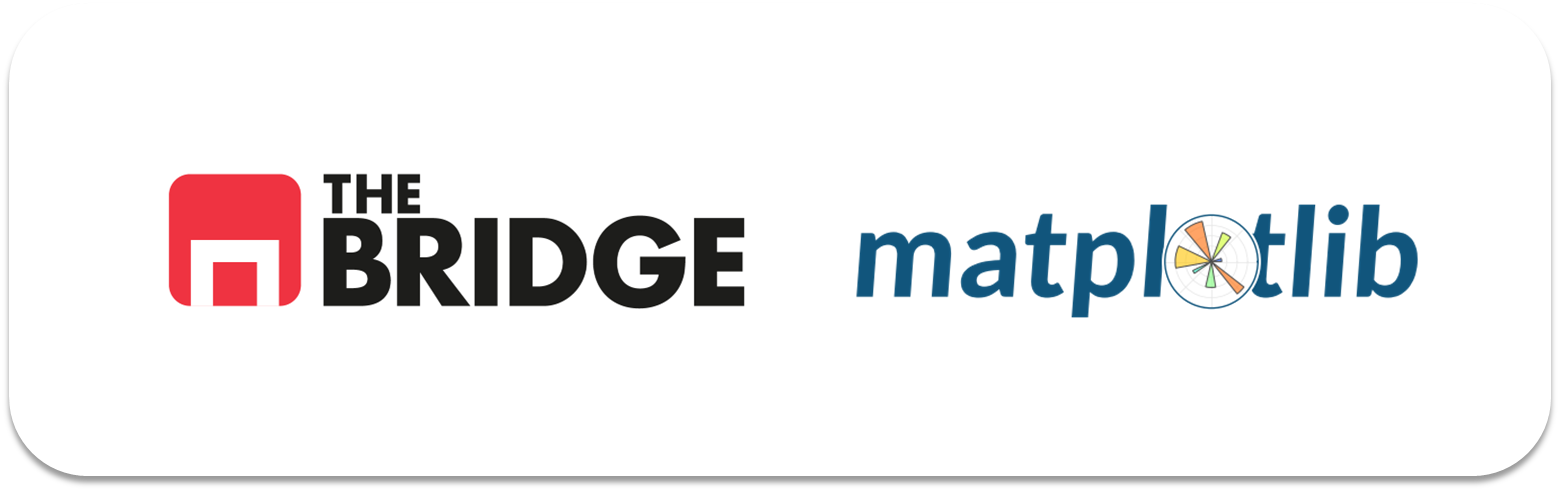

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [411]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [412]:
df = pd.read_csv("./data/california_cities.csv")
df.head(5)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

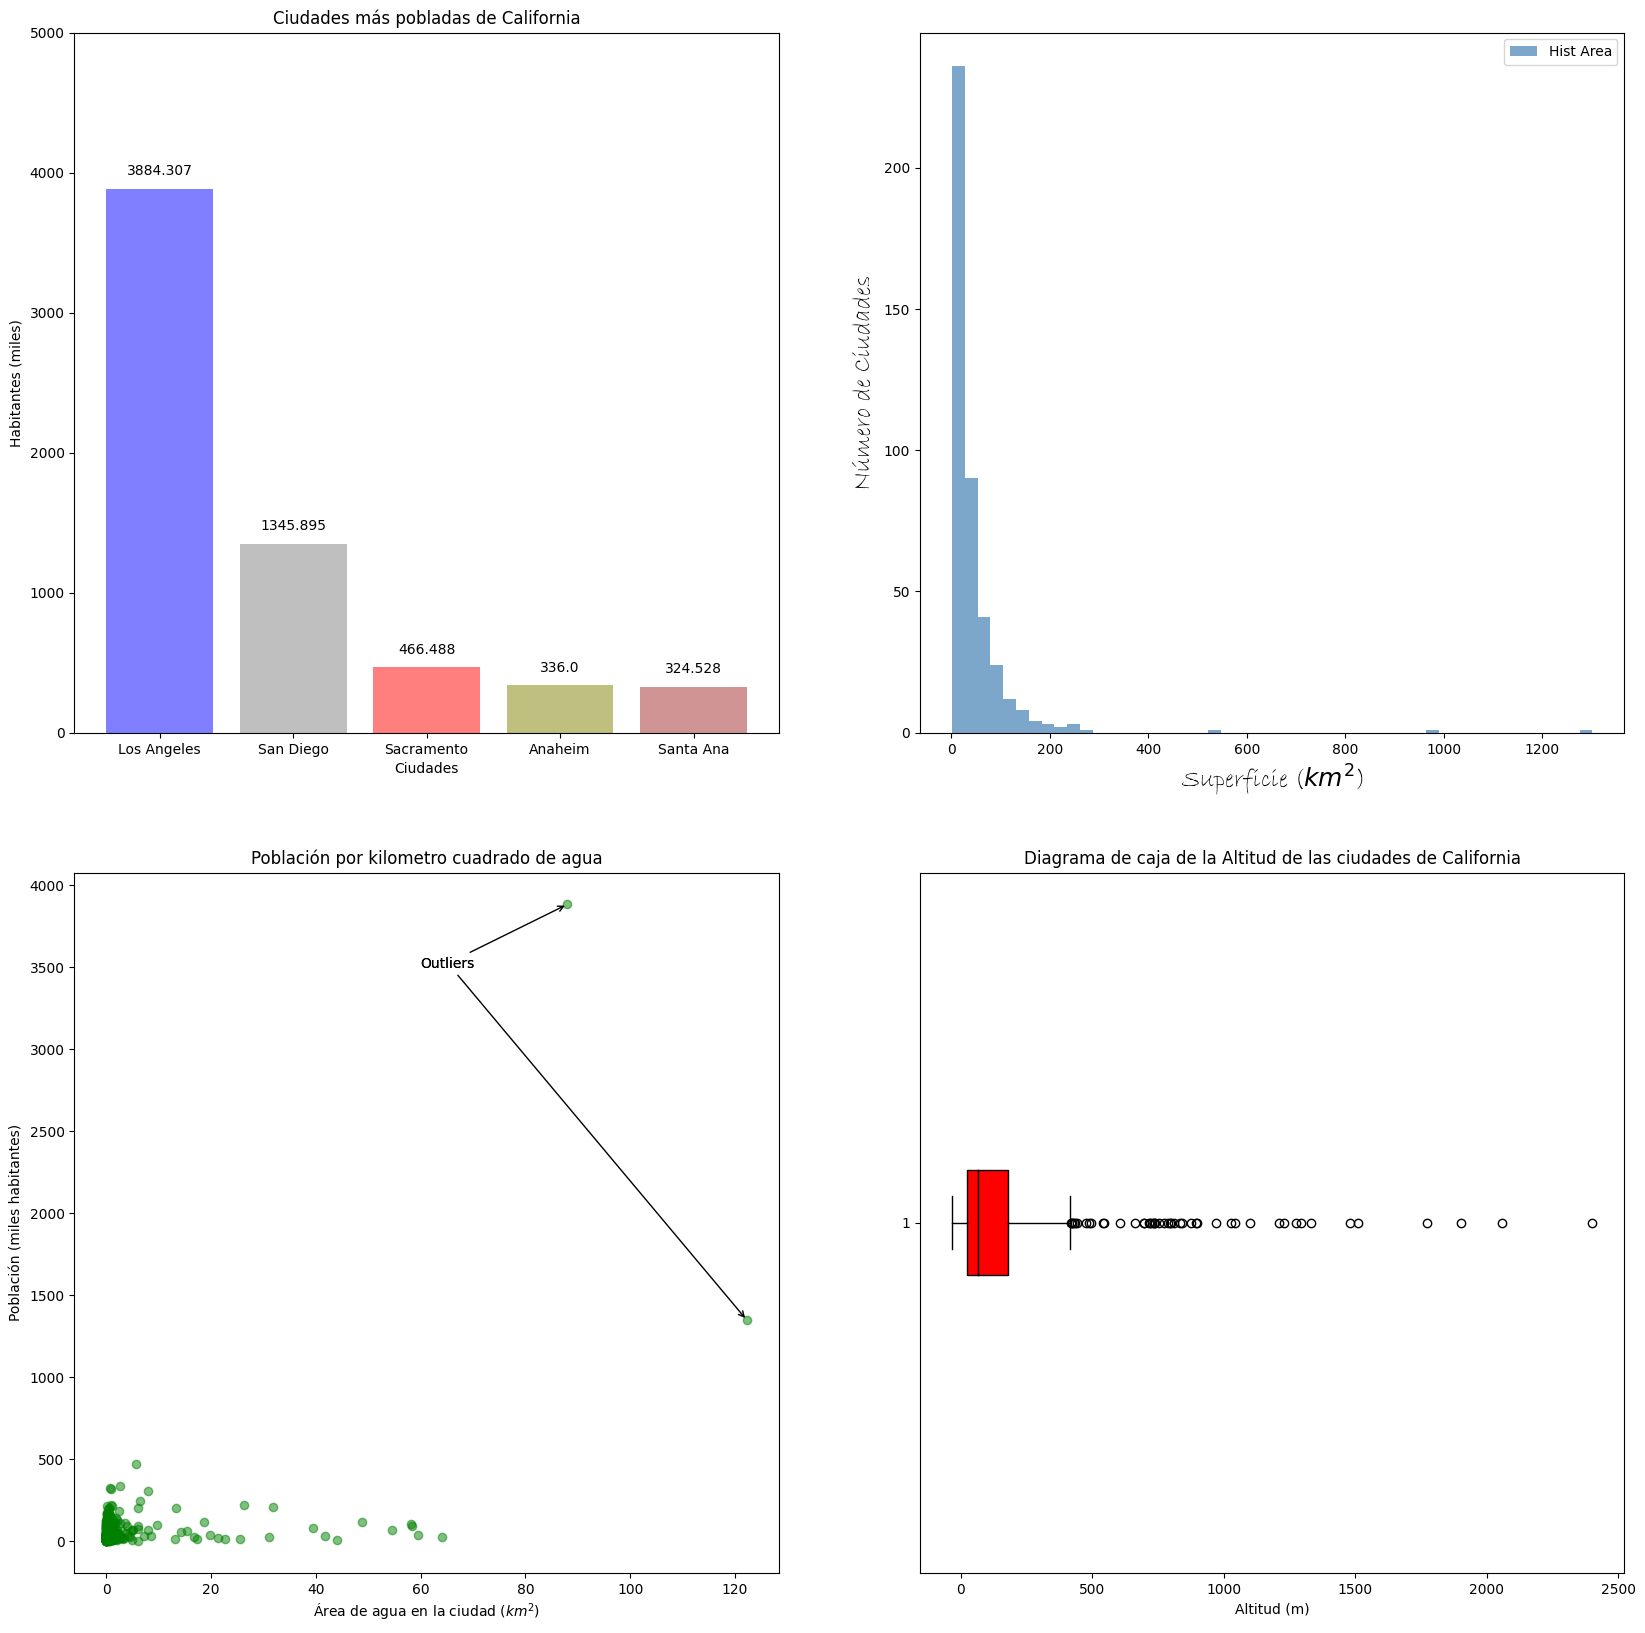

## Solución 

### Gráfico de barras [0,0]

In [414]:
# Ciudades más pobladas de forma un tanto manual
ciudades_mas_pobladas = df[df["population_total"] >= 324528].groupby(["city"]).mean().sort_values("population_total")
ciudades_mas_pobladas = ciudades_mas_pobladas.population_total
ciudades_mas_pobladas

city
SantaAna         324528.0
Anaheim          336000.0
Bakersfield      347483.0
Oakland          406253.0
LongBeach        462257.0
Sacramento       466488.0
Fresno           509039.0
SanFrancisco     837442.0
SanJose         1000536.0
SanDiego        1345895.0
LosAngeles      3884307.0
Name: population_total, dtype: float64

In [415]:
# Ciudades más pobladas con el método nlargest para sacarlo de forma automática.
df_copia = df.copy()
df_copia = df_copia.set_index("city")
df_prov = df_copia.nlargest(5,"population_total")
ciudades_series = df_prov.population_total
ciudades_series

city
LosAngeles      3884307
SanDiego        1345895
SanJose         1000536
SanFrancisco     837442
Fresno           509039
Name: population_total, dtype: int64

In [416]:
lista_valores = ciudades_series.values.tolist()
lista_ciudades = ciudades_series.index.tolist()

In [417]:
import re
lista_ciudades_convertida = []
for cadena in lista_ciudades:
    if re.match(r'\bLos',cadena) or re.match(r'\bSan', cadena):
        print("1",cadena)
        nombre_partido = re.findall(r'[A-Z][^A-Z]*',cadena)
        print("2",nombre_partido)
        nombre_final = " ".join(nombre_partido)
        print("3",nombre_final)
        lista_ciudades_convertida.append(nombre_final)
    else:
        lista_ciudades_convertida.append(cadena)

lista_ciudades_convertida

1 LosAngeles
2 ['Los', 'Angeles']
3 Los Angeles
1 SanDiego
2 ['San', 'Diego']
3 San Diego
1 SanJose
2 ['San', 'Jose']
3 San Jose
1 SanFrancisco
2 ['San', 'Francisco']
3 San Francisco


['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno']

In [418]:
lista_valores_convertidos = []
for poblacion in lista_valores:
    lista_valores_convertidos.append(poblacion/1000)

lista_valores_convertidos

[3884.307, 1345.895, 1000.536, 837.442, 509.039]

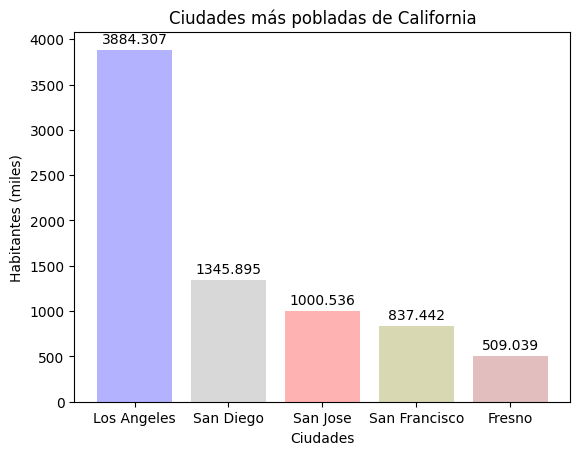

In [419]:
colores = ['blue', 'gray', 'red', 'olive', 'brown']
f, ax = plt.subplots()
ax.bar(lista_ciudades_convertida,lista_valores_convertidos, color=colores, alpha=0.3)
ax.set_title("Ciudades más pobladas de California")
ax.set_xlabel("Ciudades")
ax.set_ylabel("Habitantes (miles)")
ax.text('Los Angeles', 3959.307, '3884.307', ha='center')
ax.text('San Diego', 1420.895, '1345.895', ha='center')
ax.text('San Jose', 1075.536, '1000.536', ha='center')
ax.text('San Francisco', 912.442, '837.442', ha='center')
ax.text('Fresno', 584.039, '509.039', ha='center');

In [420]:
# De momento genero el buclo for para que al menos me haga la sintaxis y luego pueda copia y pegar.
for ciudad,poblacion in zip(lista_ciudades_convertida,lista_valores_convertidos):
    print(f"ax.text('{ciudad}', {poblacion + 75}, '{poblacion}', ha='center')")


ax.text('Los Angeles', 3959.307, '3884.307', ha='center')
ax.text('San Diego', 1420.895, '1345.895', ha='center')
ax.text('San Jose', 1075.536, '1000.536', ha='center')
ax.text('San Francisco', 912.442, '837.442', ha='center')
ax.text('Fresno', 584.039, '509.039', ha='center')


### Histograma [0,1]

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [422]:
# Datos: Numero de ciudades y superficie_km2
lista_elementos = df.groupby("area_total_km2")["city"].value_counts()
lista_elementos


area_total_km2  city          
0.813           AmadorCity        1
0.921           Loyalton          1
1.067           Tulelake          1
1.251           DelReyOaks        1
1.272           Isleton           1
                                 ..
371.946         Bakersfield       1
466.109         SanJose           1
527.401         CaliforniaCity    1
964.510         SanDiego          1
1302.000        LosAngeles        1
Name: count, Length: 477, dtype: int64

In [423]:
superficie = []
ciudades = []
for k,v in lista_elementos.items():
    superficie.append(k[0])
    ciudades.append(v)

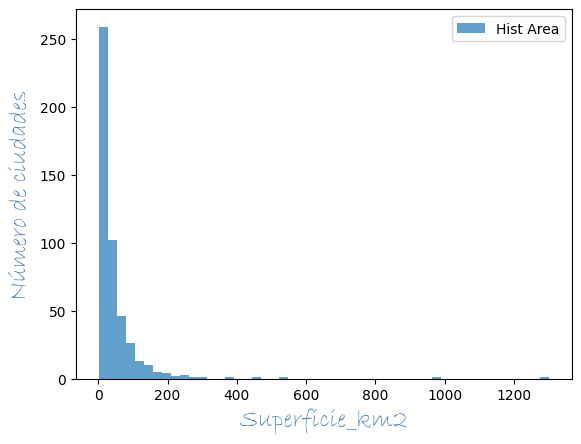

In [424]:
#50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero
font_dict = {
    "size" : 18,
    "family":"Bradley Hand itc"
}
f,ax = plt.subplots()
ax.hist(superficie,bins=50,label = "Hist Area", alpha = 0.7)
ax.set_xlabel("Superficie_km2",fontname ="Bradley Hand itc",fontsize=18, color="steelblue" )
ax.set_ylabel("Número de ciudades",fontname ="Bradley Hand itc",fontsize=18, color="steelblue" )
ax.legend();

### Scatter [1,0]
 El scatter de área de agua de un ciudad con su poblacion.

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [426]:
poblacion_scatter = df["population_total"]
agua_scatter = df["area_water_km2"]

In [427]:
lista_población_scatter = poblacion_scatter.values.tolist()
lista_agua_scatter = agua_scatter.values.tolist()

In [428]:
vmax_pobl_scatter = poblacion_scatter.nlargest(2)
vmax_pobl_scatter

239    3884307
367    1345895
Name: population_total, dtype: int64

In [429]:
vmax_agua_scatter = agua_scatter.nlargest(2)
vmax_agua_scatter

367    122.27
239     88.00
Name: area_water_km2, dtype: float64

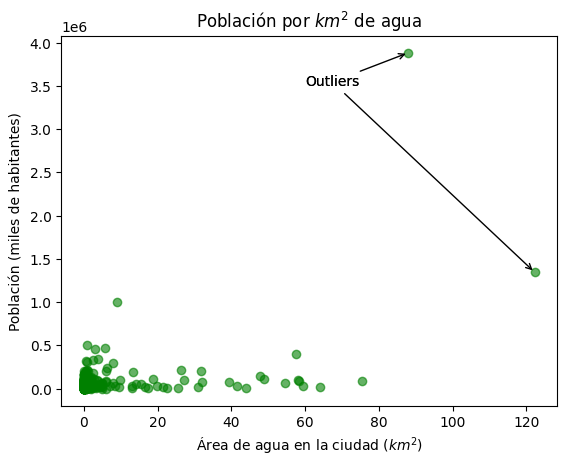

In [430]:
f,ax = plt.subplots()
ax.scatter(agua_scatter.values,poblacion_scatter.values,color="green",alpha=0.6)
ax.set_title("Población por $km^2$ de agua")
ax.set_xlabel("Área de agua en la ciudad ($km^2$)")
ax.set_ylabel("Población (miles de habitantes)")
ax.annotate('Outliers', xy=(88, 3884307), xytext=(60, 3500000),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate('Outliers', xy=(122.27, 1345895), xytext=(60, 3500000),
            arrowprops=dict(facecolor='black', arrowstyle='->'));

### Boxplot [1,1]
Diagrama de Caja de las alturas de las ciudades de California

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [432]:
alturas_boxplot = df["elevation_m"]
altura=alturas_boxplot.values.tolist()

In [440]:
import math
altura_sin_nan = [x for x in altura if not math.isnan(x)]

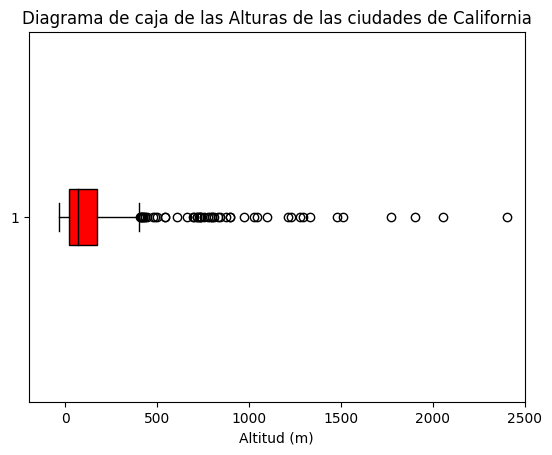

In [461]:
f,ax = plt.subplots()
ax.boxplot(altura_sin_nan,whis=1.5,vert=False, patch_artist=True,
            medianprops=dict(color='black'),
            boxprops=dict(facecolor='red'))
ax.set_title("Diagrama de caja de las Alturas de las ciudades de California")
ax.set_xlabel("Altitud (m)")
ax.set_xlim(-200,2500);

## Codigo final conjunto e imagen

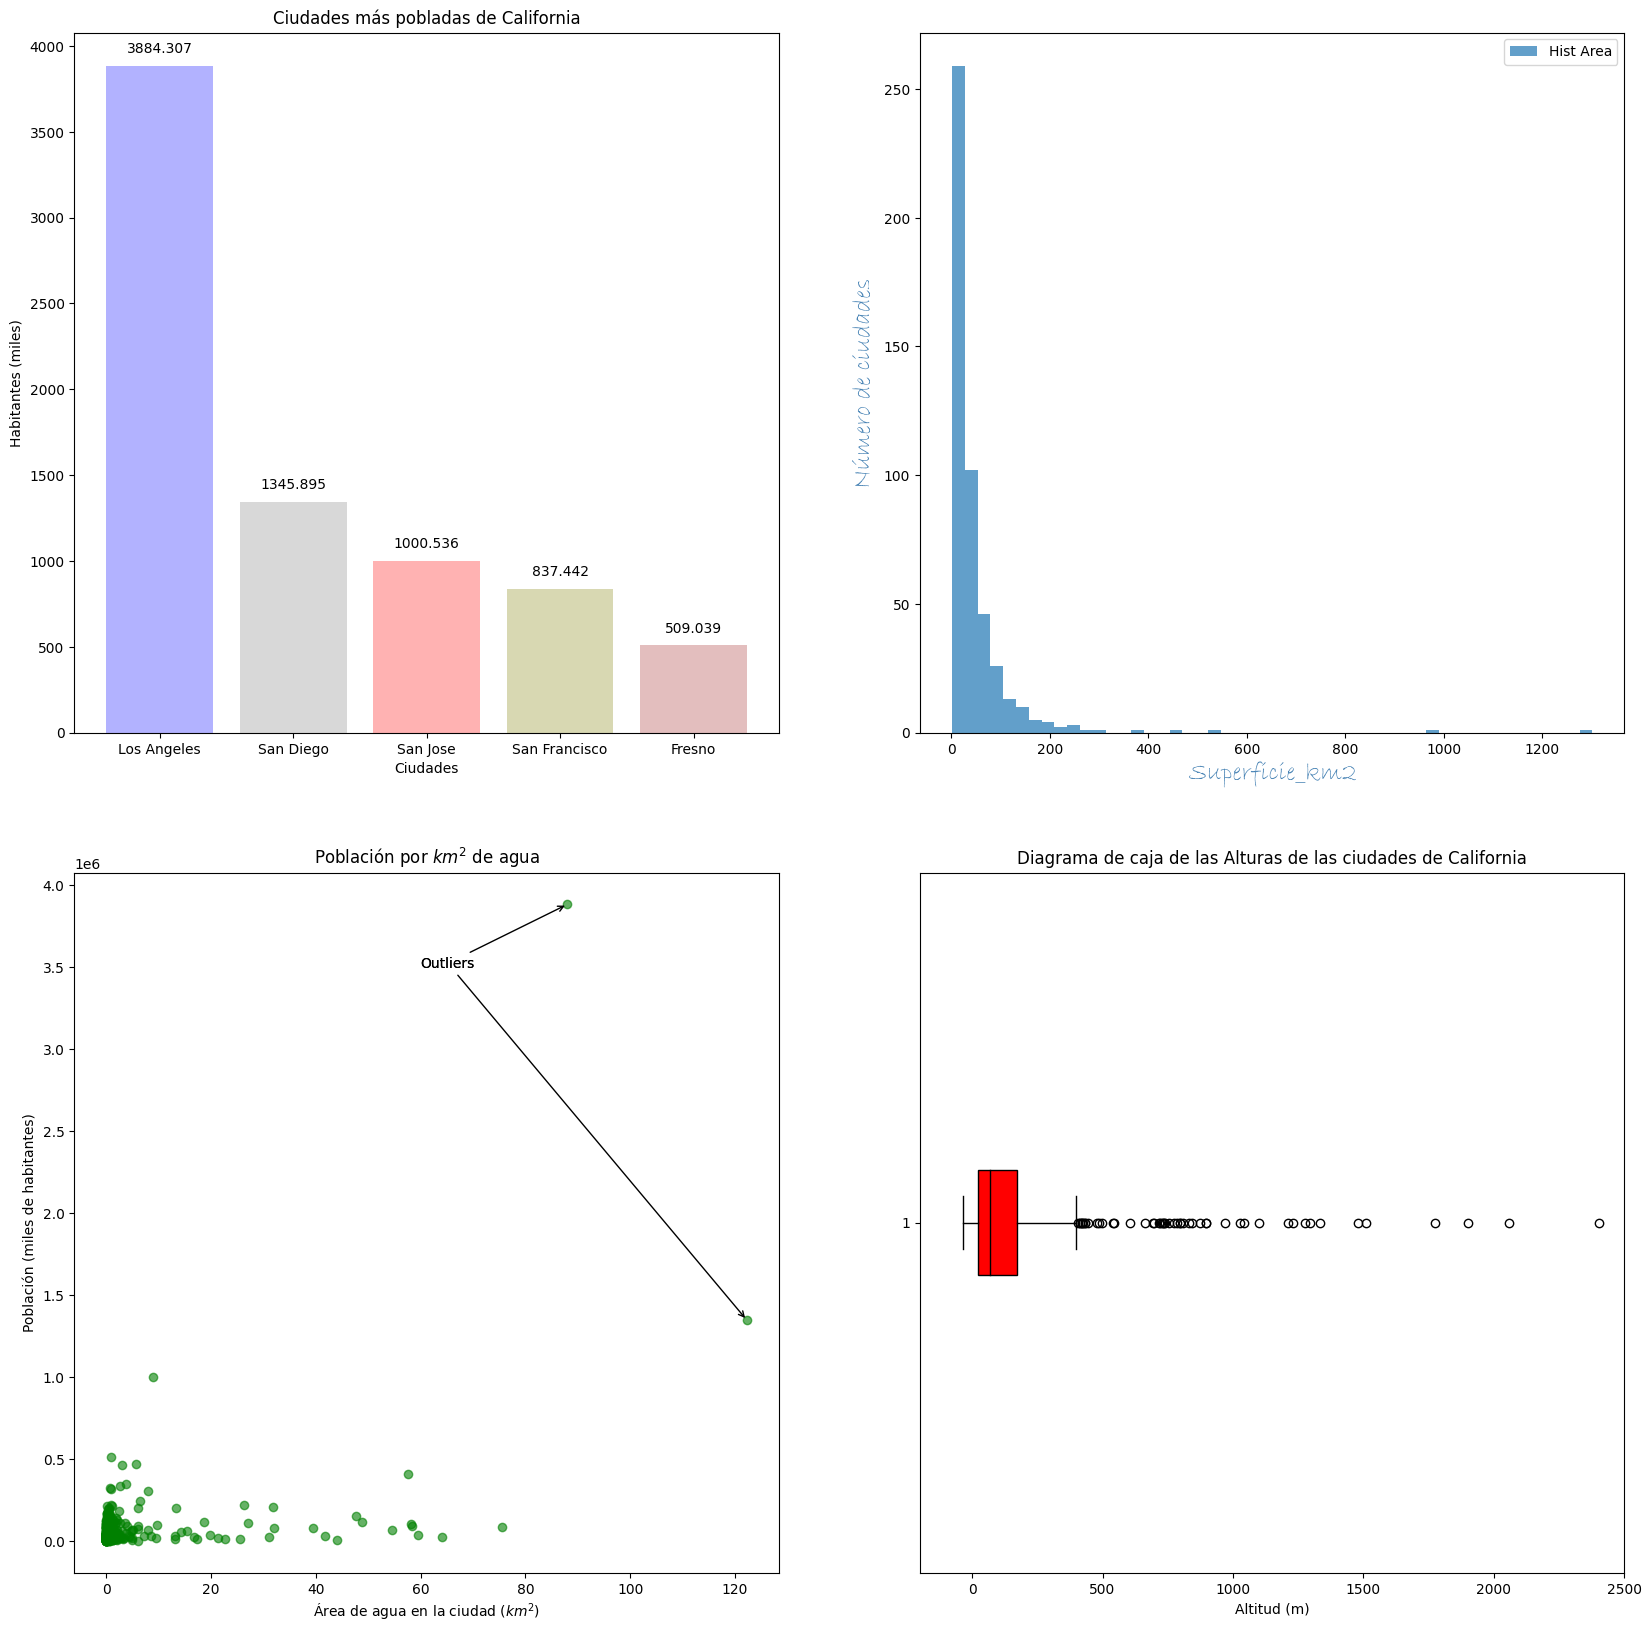

In [465]:
fig, ax = plt.subplots(2, 2, figsize=(20,20 ))

# Grafico de barras [0,0]
colores = ['blue', 'gray', 'red', 'olive', 'brown']

ax[0,0].bar(lista_ciudades_convertida,lista_valores_convertidos, color=colores, alpha=0.3)
ax[0,0].set_title("Ciudades más pobladas de California")
ax[0,0].set_xlabel("Ciudades")
ax[0,0].set_ylabel("Habitantes (miles)")
ax[0,0].text('Los Angeles', 3959.307, '3884.307', ha='center')
ax[0,0].text('San Diego', 1420.895, '1345.895', ha='center')
ax[0,0].text('San Jose', 1075.536, '1000.536', ha='center')
ax[0,0].text('San Francisco', 912.442, '837.442', ha='center')
ax[0,0].text('Fresno', 584.039, '509.039', ha='center');

# Histograma [0,1]
font_dict = {
    "size" : 18,
    "family":"Bradley Hand itc"
}
ax[0,1].hist(superficie,bins=50,label = "Hist Area", alpha = 0.7)
ax[0,1].set_xlabel("Superficie_km2",fontname ="Bradley Hand itc",fontsize=18, color="steelblue" )
ax[0,1].set_ylabel("Número de ciudades",fontname ="Bradley Hand itc",fontsize=18, color="steelblue" )
ax[0,1].legend();

# Scatter [1,0]
ax[1,0].scatter(agua_scatter.values,poblacion_scatter.values,color="green",alpha=0.6)
ax[1,0].set_title("Población por $km^2$ de agua")
ax[1,0].set_xlabel("Área de agua en la ciudad ($km^2$)")
ax[1,0].set_ylabel("Población (miles de habitantes)")
ax[1,0].annotate('Outliers', xy=(88, 3884307), xytext=(60, 3500000),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
ax[1,0].annotate('Outliers', xy=(122.27, 1345895), xytext=(60, 3500000),
            arrowprops=dict(facecolor='black', arrowstyle='->'));

# Boxplot [1,1]

ax[1,1].boxplot(altura_sin_nan,whis=1.5,vert=False, patch_artist=True,
            medianprops=dict(color='black'),
            boxprops=dict(facecolor='red'))
ax[1,1].set_title("Diagrama de caja de las Alturas de las ciudades de California")
ax[1,1].set_xlabel("Altitud (m)")
ax[1,1].set_xlim(-200,2500);

fig.savefig('./data/img_practica_obligatoria.png', dpi=300, bbox_inches='tight')

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

HECHO !!!! Guardada en carpeta data con el nombre de img_practica_obligatoria.png